# Trabalho Final – Programando IA com Python

#### Bibliotecas principais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

## 1. Leia o arquivo lemonades.csv usando pandas

In [2]:
Lemonades = pd.read_csv('data/Lemonades.csv', delimiter=';')
Lemonades.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25
3,07/04/2016,Beach,134,99,76,98.0,0.25
4,07/05/2016,Beach,159,118,78,135.0,0.25


## 2. Retorne as informações sobre as colunas e as principais estatísticas sobre o dataset

#### °Formato do dataframe: linhas x colunas

In [3]:
print('formato: ', Lemonades.shape)

formato:  (32, 7)


In [4]:
#tipo de dados por colunas
print(Lemonades.dtypes)

Date            object
Location        object
Lemon            int64
Orange           int64
Temperature      int64
Leaflets       float64
Price          float64
dtype: object


#### °Principais estatísticas

In [5]:
print(Lemonades.describe())

#Categóricos
print('\n',Lemonades.groupby(by =['Location']).size())

            Lemon      Orange  Temperature    Leaflets      Price
count   32.000000   32.000000    32.000000   31.000000  32.000000
mean   116.156250   80.000000    78.968750  108.548387   0.354688
std     25.823357   21.863211     4.067847   20.117718   0.113137
min     71.000000   42.000000    70.000000   68.000000   0.250000
25%     98.000000   66.750000    77.000000   90.000000   0.250000
50%    113.500000   76.500000    80.500000  108.000000   0.350000
75%    131.750000   95.000000    82.000000  124.000000   0.500000
max    176.000000  129.000000    84.000000  158.000000   0.500000

 Location
Beach    17
Park     15
dtype: int64


#### °Estátiscas por localização

In [6]:
print('Média')
print(Lemonades.groupby(by =['Location']).mean())
print('\nMediana')
print(Lemonades.groupby(by =['Location']).median())
print('\nQuantidade')
print(Lemonades.groupby(by =['Location']).count())
print('\nDesvio Padrão')
print(Lemonades.groupby(by =['Location']).std())
print('\nMínimo')
print(Lemonades.groupby(by =['Location']).min())
print('\nMáximo')
print(Lemonades.groupby(by =['Location']).max())

Média
               Lemon     Orange  Temperature    Leaflets     Price
Location                                                          
Beach     118.823529  82.470588    79.705882  108.058824  0.305882
Park      113.133333  77.200000    78.133333  109.142857  0.410000

Mediana
          Lemon  Orange  Temperature  Leaflets  Price
Location                                             
Beach       122      85           81     108.0   0.25
Park        110      75           80     106.0   0.50

Quantidade
          Date  Lemon  Orange  Temperature  Leaflets  Price
Location                                                   
Beach       16     17      17           17        17     17
Park        15     15      15           15        14     15

Desvio Padrão
              Lemon     Orange  Temperature   Leaflets     Price
Location                                                        
Beach     25.476056  21.940595     3.077432  20.882022  0.098238
Park      26.765828  22.191375     4.94

## 3. Realize a limpeza do dataset:

### a. verifique se existe valores nulos

In [7]:
Lemonades.isna().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

### b. verifique e remova, se existir, linhas duplicadas

In [8]:
#Verifica valor faltante
Lemonades[Lemonades.duplicated()]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
6,07/06/2016,Beach,103,69,82,90.0,0.25


In [9]:
#Exclui Linhas encontradas
Lemonades = Lemonades.drop_duplicates()

In [10]:
#Verifica se ainda temos linhas duplicadas
Lemonades[Lemonades.duplicated()]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price


### c. trate os elementos faltantes (interpolação (data) e media)

In [11]:
#Tratamento da Coluna Leaflets
Lemonades['Leaflets'] = Lemonades['Leaflets'].fillna(Lemonades['Leaflets'].mean())

In [12]:
#Tratamento e indexando a Coluna Date
Lemonades['Date'] = Lemonades['Date'].fillna('07/08/2016')
Lemonades['Date'] = pd.to_datetime(Lemonades['Date'])
Lemonades = Lemonades.set_index('Date')

In [13]:
#Tratamento de dado faltante da Coluna Date com interpolate
Lemonades.interpolate(method ='linear') 

,Location,Lemon,Orange,Temperature,Leaflets,Price
Date,,,,,,
2016-07-01,Park,97,67,70,90.000000,0.25
2016-07-02,Park,98,67,72,90.000000,0.25
2016-07-03,Park,110,77,71,104.000000,0.25
2016-07-04,Beach,134,99,76,98.000000,0.25
2016-07-05,Beach,159,118,78,135.000000,0.25
2016-07-06,Beach,103,69,82,90.000000,0.25
2016-07-07,Beach,143,101,81,135.000000,0.25
2016-07-08,Beach,123,86,82,113.000000,0.25
2016-07-09,Beach,134,95,80,126.000000,0.25


## 4. Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja


In [14]:
Lemonades['Sales'] = Lemonades['Orange'] + Lemonades['Lemon']
Lemonades.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
Date,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25,164
2016-07-02,Park,98,67,72,90.0,0.25,165
2016-07-03,Park,110,77,71,104.0,0.25,187
2016-07-04,Beach,134,99,76,98.0,0.25,233
2016-07-05,Beach,159,118,78,135.0,0.25,277


## 5. Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)


In [15]:
Lemonades['Revenue'] = Lemonades['Sales'] * Lemonades['Price']
Lemonades.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2016-07-03,Park,110,77,71,104.0,0.25,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25


## 6. Escreva uma função que retorne o lucro total


In [16]:
def calc_total(df):
    return df['Revenue'].sum()

lemonades = calc_total(Lemonades)

## 7. Escreva uma função que receba dois parâmetros, dataset e temp(int). Se temp for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do período observado; se -1, retorna a temperatura mínima


In [17]:
def multi_calculate(df, temp):
    if temp == 1:
        return df['Temperature'].max()
    elif temp == 0:
        return df['Temperature'].mean()
    elif temp == -1:
        return df['Temperature'].min()
    
print(multi_calculate(Lemonades, 1))
print(multi_calculate(Lemonades, 0))
print(multi_calculate(Lemonades, -1))

84
78.87096774193549
70


## 8. Escreva uma função que receba dois parâmetros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach'


In [18]:
def adjust(data, loc):
    if loc == 'Park':
        for row in data.itertuples():
            if row.Location == loc:
                data.at[row.Index, 'Price'] = row.Price * 1.15
        return data 
    elif loc == 'Beach':
        for row in data.itertuples():
            if row.Location == loc:
                data.at[row.Index, 'Price'] = row.Price * 1.10
        return data
    else:
        return 'You need to specify Park or Beach'
    


In [19]:
beachdf = adjust(Lemonades, 'Beach')
print(beachdf.head())
parkdf = adjust(Lemonades, 'Park')
print(parkdf.head())


           Location  Lemon  Orange  Temperature  Leaflets  Price  Sales  \
Date                                                                      
2016-07-01     Park     97      67           70      90.0  0.250    164   
2016-07-02     Park     98      67           72      90.0  0.250    165   
2016-07-03     Park    110      77           71     104.0  0.250    187   
2016-07-04    Beach    134      99           76      98.0  0.275    233   
2016-07-05    Beach    159     118           78     135.0  0.275    277   

            Revenue  
Date                 
2016-07-01    41.00  
2016-07-02    41.25  
2016-07-03    46.75  
2016-07-04    58.25  
2016-07-05    69.25  
           Location  Lemon  Orange  Temperature  Leaflets   Price  Sales  \
Date                                                                       
2016-07-01     Park     97      67           70      90.0  0.2875    164   
2016-07-02     Park     98      67           72      90.0  0.2875    165   
2016-07-03     P

In [20]:
df = adjust(Lemonades, 'Beach')
df.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.2875,164,41.00
2016-07-02,Park,98,67,72,90.0,0.2875,165,41.25
2016-07-03,Park,110,77,71,104.0,0.2875,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.3025,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.3025,277,69.25


## 9. Escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank (descendente)


In [21]:
def RankTemperature(df):
    df['Rank'] = df['Temperature'].rank(ascending=0)
    return df.sort_values(by='Rank')

RankTemperature(Lemonades)

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,Rank
Date,,,,,,,,,
2016-07-25,Park,156,113,84,135.000000,0.5750,269,134.50,1.5
2016-07-12,Beach,130,95,84,99.000000,0.3025,225,56.25,1.5
2016-07-26,Park,176,129,83,158.000000,0.4025,305,106.75,3.5
2016-07-11,Beach,162,120,83,135.000000,0.3025,282,70.50,3.5
2016-07-24,Park,121,82,82,117.000000,0.5750,203,101.50,8.0
2016-07-30,Beach,88,57,82,81.000000,0.4235,145,50.75,8.0
2016-07-10,Beach,140,98,82,131.000000,0.3025,238,59.50,8.0
2016-07-31,Beach,76,47,82,68.000000,0.4235,123,43.05,8.0
2016-07-06,Beach,103,69,82,90.000000,0.3025,172,43.00,8.0


## 10. Imprima um gráfico de linha que retorne o lucro ao longo do tempo


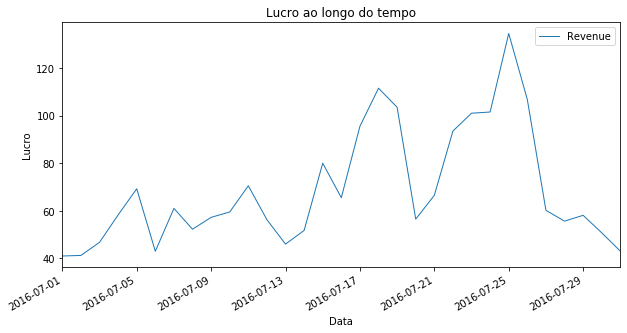

In [22]:
plt.figure(figsize=(10,5)) 
Lemonades['Revenue'].plot(linewidth=1, x_compat=True)
plt.title('Lucro ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Lucro')
plt.legend()
plt.show()

## 11. Crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados? (Use a correlação de Pearson e explique o significado do valor obtido por ela)


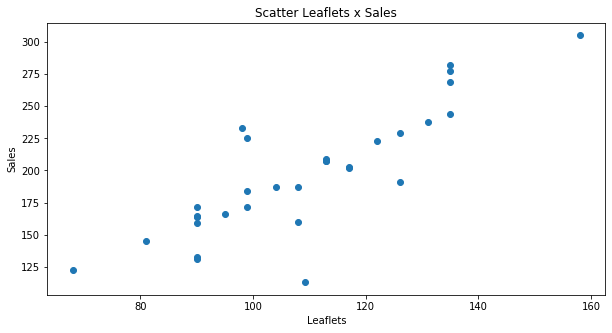

In [23]:
#Scatter
plt.figure(figsize=(10,5))
plt.scatter(Lemonades['Leaflets'], Lemonades['Sales'])
plt.title('Scatter Leaflets x Sales')
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.show()

In [24]:
corr, _ = pearsonr(Lemonades['Leaflets'], Lemonades['Sales'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.843


#### Como podem perceber, a coluna Leaflets tem uma correção forte correlação com a coluna sale, ou seja, quanto mais panfletos entregues maior as chances de aumentas o volume de vendas.

## 12. Crie um histograma com 10 bins que mostre o lucro (revenue)


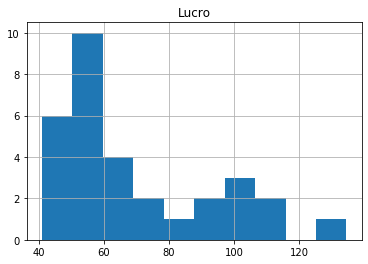

In [25]:
Lemonades['Revenue'].hist(bins=10)
plt.title("Lucro")
plt.show()

## 13. Crie um gráfico de linha que mostre o lucro por tipo de fruta ao longo do tempo


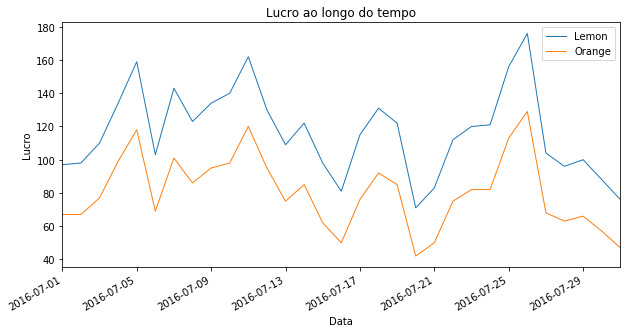

In [26]:
plt.figure(figsize=(10,5)) 
Lemonades['Lemon'].plot(linewidth=1, x_compat=True)
Lemonades['Orange'].plot(linewidth=1, x_compat=True)
plt.title('Lucro ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Lucro')
plt.legend()
plt.show()

## 14. Ajuste uma Regressão Linear aos dados para predizer vendas usando cada uma das features abaixo:



###  a. Temperature


In [27]:
y = Lemonades['Sales'].values
x = Lemonades['Temperature'].values
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train.reshape(-1, 1), y_train.ravel()) # flatten arrays
y_pred = lr_model.predict(X_test.reshape(-1, 1))
print(y_pred)
print(mean_squared_error(y_test,y_pred))
print(lr_model.coef_)
# Predição de venda se temperatura for 90
pred_value = np.array([90]).reshape(-1, 1)
lr_model.predict(pred_value)
temp = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train,  'y_test': y_test, 'y_pred': y_pred}


[216.89361079 172.41295428 216.89361079 211.33352872 205.77344666
 216.89361079 216.89361079 228.01377491 189.09320047 150.17262603]
1344.6493251182978
[5.56008206]


###  b. Leaflets


In [28]:
y = Lemonades['Sales'].values
x = Lemonades['Leaflets'].values
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train.reshape(-1, 1), y_train.ravel()) # flatten arrays
y_pred = lr_model.predict(X_test.reshape(-1, 1))
print(y_pred)
print(mean_squared_error(y_test,y_pred))
print(lr_model.coef_)
# Predição de venda se folhetos for 180
pred_value = np.array([180]).reshape(-1, 1)
lr_model.predict(pred_value)
leaf = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train,  'y_test': y_test, 'y_pred': y_pred}


[158.6938895  158.6938895  212.76544574 222.7786969  230.78929782
 240.80254898 140.67003742 248.81314991 176.71774158 158.6938895 ]
138.0957581305987
[2.00265023]


###  c. Price

In [29]:
y = np.array(Lemonades['Sales'].values)
x = np.array(Lemonades['Price'].values)
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train.reshape(-1, 1), y_train.ravel()) # flatten arrays
y_pred = lr_model.predict(X_test.reshape(-1, 1))
print(y_pred)
print(mean_squared_error(y_test,y_pred))
print(lr_model.coef_)
# Predição de venda se preço for 0.70
pred_value = np.array([0.70]).reshape(-1, 1)
lr_model.predict(pred_value)
price = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train,  'y_test': y_test, 'y_pred': y_pred}


[200.21790956 165.29852692 170.47176879 170.47176879 217.46204914
 217.46204914 196.59664025 170.47176879 217.46204914 220.04867008]
2387.872543282379
[-172.44139577]


## 15. Retorne um gráfico com a reta ajustada aos dados para cada feature e diga se ela é uma variável boa ou não para predizer vendas. Comente o resultado obtido


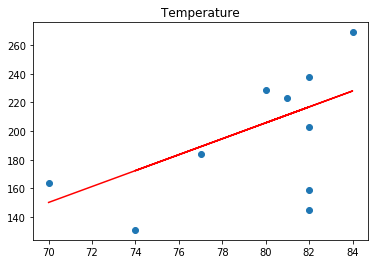

In [30]:
plt.scatter(temp['X_test'], temp['y_test'])
plt.plot(temp['X_test'], temp['y_pred'], color='red')
plt.title('Temperature')
plt.show()

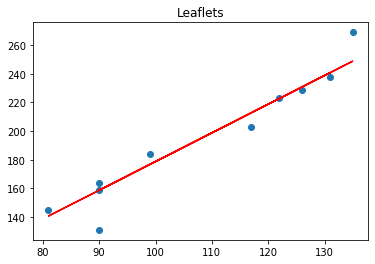

In [31]:
plt.scatter(leaf['X_test'], leaf['y_test'])
plt.plot(leaf['X_test'], leaf['y_pred'], color='red')
plt.title('Leaflets')
plt.show()

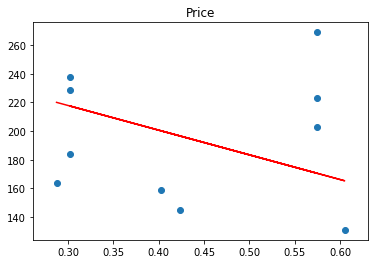

In [32]:
plt.scatter(price['X_test'], price['y_test'])
plt.plot(price['X_test'], price['y_pred'], color='red')
plt.title('Price')
plt.show()

## 16. Ajuste uma Regressão Linear aos dados para predizer vendas usando as três features juntas. Comente o resultado obtido


In [33]:
y = Lemonades['Sales'].values
x = Lemonades[['Leaflets','Price', 'Temperature']].values
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train) # flatten arrays
y_pred = lr_model.predict(X_test)
print(y_pred)
print(mean_squared_error(y_test,y_pred))
print(lr_model.coef_)
# Predição de venda se Leaflets = 90, preço for 0.70 e temperatura 70
pred_value = np.array([90, 0.31, 70]).reshape(-1, 3)
lr_model.predict(pred_value)

[172.76184568 119.40932519 197.82726303 204.32253792 249.49963726
 264.69894333 152.72211892 237.45777749 190.05386557 155.06326972]
300.3462997342187
[   1.87932372 -148.84825022    2.90134373]


array([151.71418409])

### O resultado foi uma venda estima de 154.8

## 17. Generalize o algoritmo de Regressão Linear implementada em sala para que ele possa ser usado para regressão multivariada


In [34]:
### TODO

## 18. Aplique o algoritmo implementado na questão 16 no conjunto de dados consumo_cerveja.csv usando as mesmas features para treinamento:


In [35]:
### Lendo o arquivo cerveja
cerveja = pd.read_csv('data/Consumo_cerveja.csv', sep=';')
cerveja = cerveja.rename(columns={'Temperatura Media (C)':'meanTemp','Temperatura Minima (C)':'minTemp','Temperatura Maxima (C)':'maxTemp',
                       'Precipitacao (mm)':'precip','Final de Semana':'weekend','Consumo de cerveja (litros)':'consumo'})
cerveja.head()

,Data,meanTemp,minTemp,maxTemp,precip,weekend,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [36]:
### TODO

## 19. Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning


In [37]:
### Usando algoritmo

In [38]:
#### TODO

## usando Sklearn

In [39]:
x = cerveja.drop(columns=['consumo', 'Data'])
y = cerveja['consumo']

split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train) # flatten arrays
y_pred = lr_model.predict(X_test)
print(y_pred)
print(mean_squared_error(y_test,y_pred))
print(lr_model.coef_)


[25.60041023 26.97117725 28.15676471 21.63976738 27.27893434 17.9680884
 22.52646043 18.88477877 18.11467917 20.80744662 32.32692642 26.88896613
 25.32979006 25.59637121 20.68308117 22.34253797 28.16697846 27.18762899
 24.68241004 28.76007104 34.51946727 21.63357198 29.68883845 19.13015069
 25.0991101  24.50233944 29.09697601 30.20736403 22.9154664  24.15280354
 24.33409764 29.82119766 28.44540146 32.37941343 23.53300127 27.18629236
 27.44602729 23.5318631  25.28364412 31.71735746 28.13496313 32.12664352
 28.18234752 24.72125899 24.97014138 31.57879269 24.7722412  24.85857339
 25.98995384 29.23707777 28.90190825 31.86458302 31.45485689 33.59757384
 20.1781985  25.74233252 31.27095578 30.75217967 26.65798824 24.20796489
 22.42241174 28.12085385 24.59741966 23.27735811 29.32854549 29.611651
 25.16289502 19.76865493 20.24552293 23.93819897 29.4685427  29.93577241
 30.99694365 24.19110425 19.76140665 17.24229843 22.34155244 26.25754427
 30.52918875 35.90525616 24.54895912 24.56260657 25.64

## 20. Prediga o consumo usando seu modelo e o modelo da sklearn


In [40]:
### Usando algoritmo

In [41]:
#### TODO

In [42]:
### Usando sklearn

In [43]:
# Predição de venda se meanTemp = 33 minTemp = 26 maxTemp = 38 precip = 0 weekend = 1
pred_value = np.array([33,26,33,0,1]).reshape(-1, 5)
lr_model.predict(pred_value)

array([34.86848385])

## 21. Calcule o MSE de ambos

In [44]:
#### TODO